In [186]:
import pandas as pd
import json
from collections import deque
import matplotlib.pyplot as plt

In [187]:
with open('/opt/ml/final/output/vflat_image_1.json') as f:
    json_data = json.load(f)

<h3>좌표에 w를 곱해서 겹치게 하기때문에 적절한 w값을 찾아야함

In [196]:
word_list = json_data['ocr']['word']
text_list = []
box_list = []
avg_x_list = []
avg_y_list = []

for word in word_list:
    point_list = []  
    w = 0.09 # 수정해야하는 값
    w1 = 1 + w
    w2 = 1 - w
    x_w = [w2,w1,w2,w1]
    y_w = [w2,w2,w1,w1]
    sum_x = 0
    sum_y = 0
    
    for idx, point in enumerate(word['points']):
        sum_x += point[0]
        sum_y += point[1]
        point_list.append((point[0] * x_w[idx], point[1] * y_w[idx]))
        
    box_list.append(point_list)
    text_list.append(word['text'])
    avg_x_list.append(sum_x/4)
    avg_y_list.append(sum_y/4)

In [189]:
def isCross(origin,target):
    x_list = []
    y_list = []
    for x, y in origin:
        x_list.append(x)
        y_list.append(y)
    max_x = max(x_list)
    min_x = min(x_list)
    max_y = max(y_list)
    min_y = min(y_list)
    
    for x, y in target:
        if min_x<=x and x<=max_x and min_y<=y and y<=max_y:
            return True;

In [190]:
graph = [[] for _ in range(len(box_list))]

for i, origin in enumerate(box_list):
    for j, target in enumerate(box_list):
        if i >= j :
            continue
        if isCross(origin,target):
            graph[i].append(j)
            graph[j].append(i)
        

In [191]:
print(graph)

[[3], [2], [1], [0], [5, 6], [4], [4, 8], [8], [6, 7], [10, 11, 15], [9, 11], [9, 10, 14], [13, 16, 17], [12, 16, 17], [11, 15, 16], [9, 14], [12, 13, 14, 17], [12, 13, 16], [31, 40, 56, 57, 58], [20], [19, 22, 23, 26, 29, 30, 34, 48], [22, 23, 24, 25, 32, 33, 34, 38, 48, 49], [20, 21, 23, 26, 29, 30, 34, 47, 49], [20, 21, 22, 24, 26, 30, 32, 34, 47, 48, 49], [21, 23, 25, 27, 29, 32, 33, 38, 49], [21, 24, 27, 29, 32, 33, 38, 47], [20, 22, 23, 29, 30, 34, 48], [24, 25, 29, 32, 38, 47], [35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 50, 51, 52, 53, 54, 55], [20, 22, 24, 25, 26, 27, 30, 32, 33, 34, 38, 47, 48, 49, 62, 63, 64, 65, 66, 67, 68], [20, 22, 23, 26, 29, 34, 47, 48, 49, 61, 62, 63, 64, 65, 67], [18, 40, 57, 58], [21, 23, 24, 25, 27, 29, 33, 38, 65, 66, 68], [21, 24, 25, 29, 32, 38, 47, 65, 66, 68], [20, 21, 22, 23, 26, 29, 30, 47, 49, 62, 63, 64, 65, 67], [28, 36, 37, 39, 41, 42, 43, 44, 50, 51, 52, 53], [28, 35, 37, 41, 42, 43, 44, 45, 46, 53, 54], [28, 35, 36, 41, 42, 43, 44, 45, 46,

In [192]:
sector_list = [-1 for _ in range(len(box_list))]
sector_idx = 0

for i in range(len(graph)):
    if sector_list[i] == -1:
        que = deque()
        que.append(i)
        sector_list[i] = sector_idx
        
        while que:
            now = que.pop()
            # print(now,que)
            # print(bool(que))
            for next in graph[now]:
                if sector_list[next] == -1:
                    sector_list[next] = sector_idx
                    que.append(next)
        
        sector_idx += 1

In [193]:
print(sector_list)

[0, 1, 1, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4]


In [194]:
bc_df = pd.DataFrame({'text':text_list,'x':avg_x_list,'y':avg_y_list,'cluster':sector_list})
bc_df

,text,x,y,cluster
0,계명산업,1501.50,396.00,0
1,KEM,578.50,382.00,1
2,|>,784.00,385.00,1
3,주식회사,2467.50,423.00,0
4,kemico.,658.25,665.50,2
...,...,...,...,...
85,14001,552.00,2018.00,4
86,|,671.00,2017.25,4
87,14001,895.00,2018.00,4
88,IISO,384.00,2020.00,4


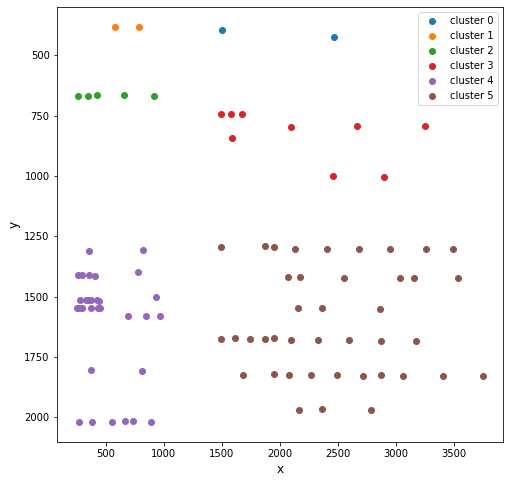

In [195]:
plt.figure(figsize = (8, 8))

for i in range(sector_idx):
    plt.scatter(bc_df.loc[bc_df['cluster'] == i, 'x'], bc_df.loc[bc_df['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.xlabel('x', size = 12)
plt.ylabel('y', size = 12)
plt.gca().invert_yaxis()
plt.show()